## Commonly Used Classification Performance Indexes

COSI/ECON-148B-1 : Introduction to Machine Learning with Economic Applications

Prepared by Zizhang Chen ([zizhang2@brandeis.edu](mailto:zizhang2@brandeis.edu))

### 1. Overview
The performance indexes of a machine learning model are computed on a given dataset. They can be used to 

- Compare and select models.

- Tuning model parameters. 

- Track the training progress of a model. 

- ...

### 2. Performance Indexes

#### 2.1 Accuracy
Measures the proportion of samples that were correctly classified by the algorithm.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [11]:
# data_train = pd.read_csv("Training.csv")
# data_test = pd.read_csv("Test.csv")

data_train = pd.read_csv("Training_unbalanced.csv")
data_test = pd.read_csv("Test_unbalanced.csv")

X_train = data_train[['Feature1', 'Feature2']]
Y_train = data_train['Label']
X_test = data_test[['Feature1', 'Feature2']]
Y_test = data_test['Label']

In [12]:
clf = LogisticRegression(C = 10, solver = 'newton-cg').fit(X_train, Y_train)
Y_pred = clf.predict( X_test )

print( 'Accuracy = ', sum( Y_pred == Y_test ) / len( Y_test ) )

Accuracy =  0.932


#### 2.2 Confusion table (Binary Classification)
- True Positive (TP) refers to the number of instances that are correctly classified as positive. In a binary classification problem, positive usually represents the class of interest. For example, in a disease diagnosis problem, a positive result means the patient has the disease.

- False Positive (FP) refers to the number of instances that are incorrectly classified as positive. In other words, it is a type of error in which a negative instance is predicted as positive.

- True Negative (TN) refers to the number of instances that are correctly classified as negative. In a binary classification problem, negative usually represents the class not of interest. For example, in a disease diagnosis problem, a negative result means the patient does not have the disease.

- False Negative (FN) refers to the number of instances that are incorrectly classified as negative. It is a type of error in which a positive instance is predicted as negative.

Text(0.5, 1.0, 'Confusion Matrix')

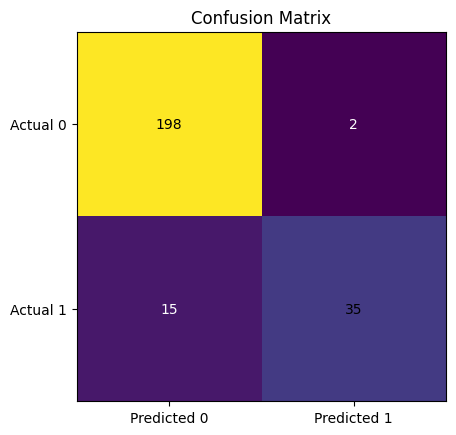

In [13]:
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred)

columns = ["Predicted 0", "Predicted 1"]
rows = ["Actual 0", "Actual 1"]

plt.imshow( cm )

# Show all ticks and label them with the respective list entries
plt.xticks(np.arange(len(columns)), labels=columns)
plt.yticks(np.arange(len(rows)), labels=rows)

# Loop over data dimensions and create text annotations.
for i in range(len(columns)):
    for j in range(len(rows)):
        if i == j:
            c = 'black'
        else:
            c = 'white'
        text = plt.text(j, i, cm[i, j], ha="center", va="center", color=c)

plt.title( 'Confusion Matrix' )

In [8]:
tn, fp, fn, tp = cm.ravel()
print('True positive:', tp)
print('True negative:', tn)
print('False positive:', fp)
print('False negative:', fn)

True positive: 175
True negative: 181
False positive: 19
False negative: 25


In [9]:
# Calculate TP, TN, FP, FN by yourself
TP = sum((Y_pred == 1) & (Y_test == 1))
TN = sum((Y_pred == 0) & (Y_test == 0))
FP = sum((Y_pred == 1) & (Y_test == 0))
FN = sum((Y_pred == 0) & (Y_test == 1))
print('True positive:', TP)
print('True negative:', TN)
print('False positive:', FP)
print('False negative:', FN)


True positive: 175
True negative: 181
False positive: 19
False negative: 25


#### 2.3 Precision, Recall, Specificity, and F1-score 


Precision, recall, sensitivity, and specificity are metrics used to evaluate the performance of binary classification algorithms.

   - **Precision** measures the proportion of positive predictions that are actually positive. It is calculated as the number of true positive predictions divided by the sum of true positive and false positive predictions. Precision answers the question **"Of all the positive predictions made by the classifier, what fraction of them are actually correct?"**
    
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

  

- **Recall**, also known as **sensitivity**, measures the proportion of positive samples that were correctly classified as positive. It is calculated as the number of true positive predictions divided by the sum of true positive and false negative predictions. Recall answers the question **"Of all the positive samples in the dataset, what fraction of them were correctly classified as positive by the classifier?"**

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

- **Specificity** also known as **selectivity** measures the proportion of negative samples that were correctly classified as negative. It is calculated as the number of true negative predictions divided by the sum of true negative and false positive predictions. Specificity answers the question **"Of all the negative samples in the dataset, what fraction of them were correctly classified as negative by the classifier?"**

$$
\text{Specificity} = \frac{TN}{FP + TN}
$$

- **F1-score** is the harmonic mean of precision and recall. It is a commonly used metric to summarize the performance of a binary classifier, especially when precision and recall are both important. 

$$
\text{F1-score} = \frac{2 * Precision * Recall}{Precision * Recall}
$$

**Note:** that precision, recall, sensitivity, specificity, and F1-score are all defined in the context of binary classification algorithms, where the goal is to predict one of two possible classes. For multiclass classification problems, these metrics can be calculated for each class and averaged across classes to obtain a single summary of the classifier's performance.



Write your own codes to calculate **Precision**, **Recall**, **Specificity**, and **F1-score**.


#### 2.4 ROC

The Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a binary classifier system as its discrimination threshold is varied. It is a plot of the true positive rate against the false positive rate.

$$ f(x) > t $$

where $f()$ is the trained classifier, $x$ is a sample, and $t$ is the threshold

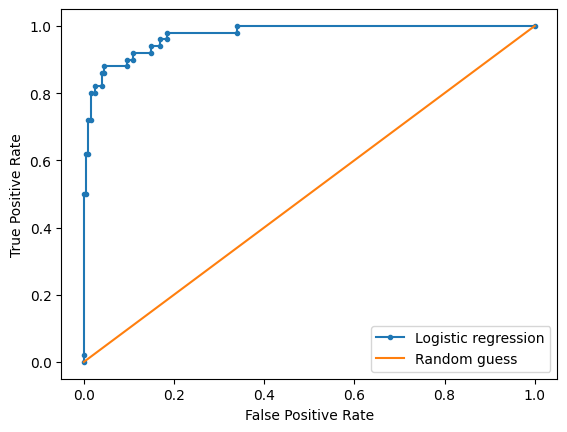

In [14]:
from sklearn import metrics
import scipy.stats as stats # If you don't have scipy, install it now.

Y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
plt.plot(fpr,tpr, marker='.', label='Logistic regression')
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), label='Random guess')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

### 2.5 AUC

The **AUC** is the area under the ROC curve and summarizes the overall performance of the classifier. A higher AUC value indicates a better classifier, with a value of 1.0 representing a perfect classifier.

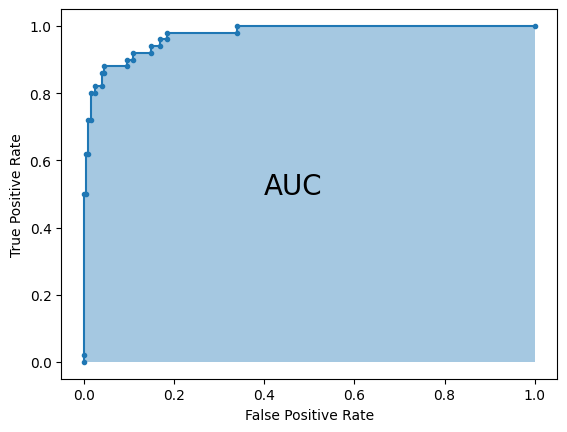

In [15]:
Y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
plt.plot(fpr,tpr, marker='.', label='Logistic regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.fill_between(fpr,tpr, step="pre", alpha=0.4)
plt.text(0.4, 0.5, 'AUC', dict(size=20))
plt.show()

#### 2.5 Get a summary report

In [16]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.930     0.990     0.959       200
           1      0.946     0.700     0.805        50

    accuracy                          0.932       250
   macro avg      0.938     0.845     0.882       250
weighted avg      0.933     0.932     0.928       250



### 3. Choices of Performance Indexes

#### 3.1 Example 1 - Fraud detection

Two classes: **Fraud** vs **Normal**

TP: our model successfully detects fraud action. (cost = $0 per case)

TN: our model successfully detects normal action. (cost = $0 per case)

FP: our model misclassifies normal actions as fraud. (cost = $10 per mistake)

FN: our model misclassifies fraud actions as normal. (cost = $10000 per mistake)

In this case, it is crucial to minimize **false negatives**, as failing to detect a fraudulent transaction could result in significant financial consequences, and **recall** is the preferred metric than the precision, as it measures the proportion of actual positive instances that were correctly identified.

#### 3.2 Example 2 -- Spam filtering

Two classes: **Spam email** vs **Normal email**

TP: our model successfully detects Spam email. (cost = $0 per case)

TN: our model successfully detects Normal email. (cost = $0 per case)

**FP**: our model classifies Normal emails as Spam emails. (cost = $100 per mistake)

FN: our model classifies Spam emails as Normal emails. (cost = $0.1 per mistake)

In this case, it is crucial to minimize **false positives**, as failing to detect a common email could miss some important information, and **precision** is the preferred metric than the recall.

#### 3.3 Discussion: Medical Diagnosis?